## Load MNIST on Python 3.x

In [2]:
import pickle
import gzip
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import fetch_mldata 
from sklearn import metrics
from collections import Counter
import matplotlib.pyplot as plt

In [3]:
# Data Processing of MNIST data
filename = 'mnist.pkl.gz'
f = gzip.open(filename, 'rb')
training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
f.close()
print(len(training_data),len(training_data[0]))
print(len(validation_data),len(validation_data[0]))
print(len(test_data),len(test_data[0]))

2 50000
2 10000
2 10000


In [4]:
# Splitting up of data into training, tetsing and validation data and target
MNIST_training_data = training_data[0]
MNIST_training_target = training_data[1]
MNIST_validation_data = validation_data[0]
MNIST_validation_target = validation_data[1]
MNIST_test_data = test_data[0]
MNIST_test_target = test_data[1]
print(len(MNIST_training_data))
print(len(MNIST_training_target))
print(MNIST_test_data.shape)

50000
50000
(10000, 784)


In [5]:
# SVM - Model trained with MNIST data
classifier1 = SVC(kernel='rbf', C=1, gamma = 0.01)
classifier1.fit(MNIST_training_data, MNIST_training_target) 
predicted_training_target = classifier1.predict(MNIST_training_data)
print(" Training Accuracy of MNIST SVC:",metrics.accuracy_score(predicted_training_target, MNIST_training_target))


 Training Accuracy of MNIST SVC: 0.98474


In [6]:
predicted_validation_target = classifier1.predict(MNIST_validation_data)
print("Validation Accuracy of MNIST SVC:",metrics.accuracy_score(predicted_validation_target, MNIST_validation_target))

Validation Accuracy of MNIST SVC: 0.9777


Testing Accuracy of MNIST SVC: 0.9761
[[ 972    0    1    0    0    2    2    1    2    0]
 [   0 1127    3    1    0    1    1    0    2    0]
 [   5    1 1008    1    1    0    2    9    5    0]
 [   0    0    3  986    0    5    0    7    8    1]
 [   0    0    5    0  959    0    3    0    2   13]
 [   2    0    0   10    1  867    4    1    5    2]
 [   6    2    0    0    2    4  942    0    2    0]
 [   0   10   15    2    2    0    0  989    1    9]
 [   3    0    2    8    4    2    2    3  949    1]
 [   5    5    2    7   13    1    0    8    6  962]]


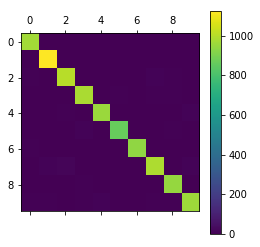

In [7]:
# SVM model tested with MNIST data
predicted_test_target = classifier1.predict(MNIST_test_data)
print("Testing Accuracy of MNIST SVC:",metrics.accuracy_score(predicted_test_target, MNIST_test_target))
# Confusion matrix is obtained using library and it is also plotted
m = confusion_matrix(MNIST_test_target, predicted_test_target)
print(m)
plt.matshow(m)
plt.colorbar()

In [8]:
# Random Forest Classifier - trained with MNIST training data
classifierRFC = RandomForestClassifier(n_estimators=10, criterion ="entropy") 
classifierRFC.fit(MNIST_training_data, MNIST_training_target) 
predicted_training_target_RFC = classifier1.predict(MNIST_training_data)
print("Training Accuracy of MNIST Random Forest:",metrics.accuracy_score(predicted_training_target_RFC, MNIST_training_target))


predicted_validation_target_RFC = classifierRFC.predict(MNIST_validation_data)
print("Validation Accuracy of MNIST Random Forest:",metrics.accuracy_score(predicted_validation_target_RFC, MNIST_validation_target))

 
predicted_testing_target_RFC = classifierRFC.predict(MNIST_test_data)
print("Testing Accuracy of MNIST Random Forest:",metrics.accuracy_score(predicted_testing_target_RFC, MNIST_test_target))

Training Accuracy of MNIST Random Forest: 0.98474
Validation Accuracy of MNIST Random Forest: 0.953
Testing Accuracy of MNIST Random Forest: 0.943


<class 'numpy.ndarray'>
(10000,)
[[ 968    0    0    2    0    2    4    2    2    0]
 [   0 1119    2    6    0    2    3    0    2    1]
 [  14    0  984    7    2    1    7    8    6    3]
 [   3    1   22  935    1   23    0   11   10    4]
 [   3    4    5    1  924    2    5    2    8   28]
 [   8    5    4   35    4  812   10    3    5    6]
 [   6    4    7    0   10    4  923    0    1    3]
 [   1    5   25   10    6    1    0  969    5    6]
 [   7    1   19   20    7   14    7    5  883   11]
 [   9    8    5   17   27    9    1   12    8  913]]


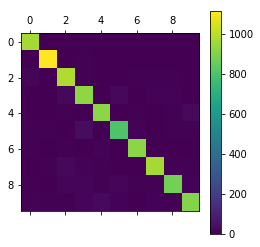

In [9]:
# COnfusion Matrix of MNIST data using Random Forest Classifier 
print(type(MNIST_test_target))
print(predicted_testing_target_RFC.shape)
m = confusion_matrix(MNIST_test_target,predicted_testing_target_RFC)
print(m)
plt.matshow(m)
plt.colorbar()

In [10]:
# Neural Network Function - Will be called by both MNIST and USPS Data later on
import keras
from keras.datasets import mnist 
from keras.layers import Dense
from keras.models import Sequential  

def NeuralNetwork(MNIST_training_data,MNIST_test_data,MNIST_training_target,MNIST_test_target) : 
    num_classes=10
    image_vector_size=28*28
    x_train = MNIST_training_data.reshape(MNIST_training_data.shape[0], image_vector_size) 
    x_test = MNIST_test_data.reshape(MNIST_test_data.shape[0], image_vector_size) 
    # One hot Encoding of the data
    y_train = keras.utils.to_categorical(MNIST_training_target, num_classes)
    y_test = keras.utils.to_categorical(MNIST_test_target, num_classes)
    image_size = 784 
    model = Sequential()
    model.add(Dense(units=32, activation='relu', input_shape=(image_size,)))
    model.add(Dense(units=num_classes, activation='softmax'))
    # Loss is categorical_crossentropy and not bicategorical because we have to predict within 10 classes
    model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=256, epochs=100,verbose=False,validation_split=.1)
    PredictedTargetValues = model.predict(np.array(x_test))
    # Finding Predicted values to use it in the Ensemble Classfier- Hard Voting
    PredictedTargetValues = PredictedTargetValues.argmax(axis=-1)
    loss,accuracy = model.evaluate(x_test, y_test, verbose=False)
    return accuracy,PredictedTargetValues   


C:\Users\tceve\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [11]:
# Accuracy for MNIST data by using Neural Network Algorithm
Mnistaccuracy,PredictedTargetValues = NeuralNetwork(MNIST_training_data,MNIST_test_data,MNIST_training_target,MNIST_test_target)
print('Accuracy for Mnist Testing  : ' + str(Mnistaccuracy))

Accuracy for Mnist Testing  : 0.9435


(10000,)
<class 'numpy.ndarray'>
(10000,)
<class 'numpy.ndarray'>
[7 2 1 ... 4 5 6]
[[ 964    0    1    1    0    5    6    1    2    0]
 [   0 1118    2    2    1    1    3    2    6    0]
 [   8    5  960   11    9    2    7   10   17    3]
 [   3    1   11  943    0   22    2   10   13    5]
 [   1    2    3    0  928    0   10    2    5   31]
 [   9    3    0   23    3  817   16    3   10    8]
 [  13    3    3    1    9    7  918    1    3    0]
 [   2    8   21    8    6    1    0  959    1   22]
 [   8    2    5   16    7   20   11    7  893    5]
 [  11    6    1   11   24    5    0   12    4  935]]


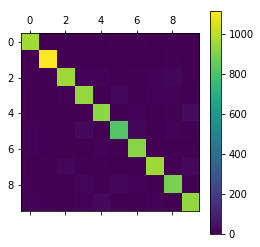

In [12]:
print(MNIST_test_target.shape)
print(type(MNIST_test_target))
print(PredictedTargetValues.shape)
print(type(PredictedTargetValues))
print(PredictedTargetValues)
# Confusion Matrix obtained for MNIST data using Neural Network
m = confusion_matrix(MNIST_test_target,PredictedTargetValues) 
print(m)
plt.matshow(m)
plt.colorbar()

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.sparse

def getLoss(w,MNIST_training_data,MNIST_training_target,lam):
    #First we get the number of training examples
    training_sample = MNIST_training_data.shape[0] 
    #Next we convert the integer class coding into a one-hot representation
    temp = MNIST_training_target.shape[0]
    oneHot_encoded_matrix = scipy.sparse.csr_matrix((np.ones(temp), (MNIST_training_target, np.array(range(temp)))))
    oneHot_encoded_matrix = np.array(oneHot_encoded_matrix.todense()).T
    y_mat = oneHot_encoded_matrix
    #Then we compute raw class scores given our input and current weights
    scores = np.dot(MNIST_training_data,w) 
    #Next we perform a softmax on these scores to get their probabilities
    scores -= np.max(scores)
    probablity = (np.exp(scores).T / np.sum(np.exp(scores),axis=1)).T
    #We then find the loss of the probabilities
    loss = (-1 / training_sample) * np.sum(y_mat * np.log(probablity)) + (lam/2)*np.sum(w*w)
    #And compute the gradient for that loss
    gradient = (-1 / training_sample) * np.dot(MNIST_training_data.T,(y_mat - probablity)) + lam*w 
    return loss,gradient

In [14]:
# Logisitic Regression using SGD with 1000 iterations
def logisticRegression(MNIST_training_data,MNIST_training_target) : 
    w = np.zeros([MNIST_training_data.shape[1],len(np.unique(MNIST_training_target))])
    lam = 1
    iterations = 1000
    learningRate = 0.01
    losses = []
    for i in range(0,iterations):
        loss,grad = getLoss(w,MNIST_training_data,MNIST_training_target,lam)
        losses.append(loss)
        w = w - (learningRate * grad)
    return w

In [15]:
def getAccuracy(MNIST_training_data,MNIST_training_target,w):
    predicted = np.dot(MNIST_training_data,w)
    # The predicted values are sent to a softmax function so as to find the probabilities
    predicted -= np.max(predicted)
    predicted_probability = (np.exp(predicted).T / np.sum(np.exp(predicted),axis=1)).T
    prediction = np.argmax(predicted_probability,axis=1)
    accuracy = sum(prediction == MNIST_training_target)/(float(len(MNIST_training_target)))
    return accuracy,prediction


w = logisticRegression(MNIST_training_data,MNIST_training_target)
AccuracyTrainLog , PredictedTargetTrainLog = getAccuracy(MNIST_training_data,MNIST_training_target,w)
print('MNIST Training Accuracy: ', AccuracyTrainLog)
w_test = logisticRegression(MNIST_test_data,MNIST_test_target)
AccuracyTestLog , PredictedTargetTestLog =  getAccuracy(MNIST_test_data,MNIST_test_target,w_test)
print('MNIST Test Accuracy: ', AccuracyTestLog)

MNIST Training Accuracy:  0.7832
MNIST Test Accuracy:  0.8022


[[ 944    0    5    9    0    0   13    1    8    0]
 [   0 1079   33    7    1    0    4    1   10    0]
 [  36   36  826   30   18    0   32   20   32    2]
 [   7    7   34  881    0    0    7   21   39   14]
 [   7   17    5    0  756    0   31    3   19  144]
 [  78   50   14  255   22  289   33   23   86   42]
 [  40   22   14    7    3    8  850    0   14    0]
 [  16   52   33    1   12    0    2  869    4   39]
 [  26   42   22   87    7    0   18   18  733   21]
 [  30   24   10   13   57    0    3   53   24  795]]


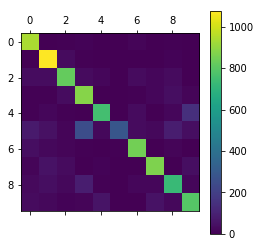

In [16]:
# Confusion MAtrix of MNIST data using Logisitic Regression
m =confusion_matrix(MNIST_test_target,PredictedTargetTestLog) 
print(m)
plt.matshow(m)
plt.colorbar()

In [17]:
print(type(MNIST_test_data))

print(PredictedTargetTestLog)
print(PredictedTargetTestLog.shape)

print(MNIST_test_target)
print(MNIST_test_target.shape)

print(MNIST_test_target[0])

<class 'numpy.ndarray'>
[7 2 1 ... 4 8 6]
(10000,)
[7 2 1 ... 4 5 6]
(10000,)
7


In [18]:
# Ensemble Classifier using majority Hard Voting
# The predicted values from Each algorithm is taken and the output predicted is the frequently predicted value
def ensembleClassifier(MNIST_test_target, PredictedTargetTestLog, predicted_testing_target_RFC, predicted_test_target,PredictedTargetValues):
    ensembleList = []
    for i in range(len(MNIST_test_target)):
        tempList = [] 
        tempList.append(PredictedTargetTestLog[i])
        tempList.append(predicted_testing_target_RFC[i])
        tempList.append(predicted_test_target[i])
        tempList.append(PredictedTargetValues[i])
        most_common,num_most_common = Counter(tempList).most_common(1)[0]
        ensembleList.append(most_common) 
    print(ensembleList)
    return metrics.accuracy_score(ensembleList, MNIST_test_target),ensembleList

In [19]:
EnsembleAccuracy, ensembleList= ensembleClassifier(MNIST_test_target, PredictedTargetTestLog, predicted_testing_target_RFC, predicted_test_target,PredictedTargetValues)
print('MNIST EnsembleAccuracy: ', EnsembleAccuracy)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 4, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 7, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 1, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

## Confusion Matrix

[[ 971    0    1    0    0    2    3    1    2    0]
 [   0 1124    1    3    1    1    3    1    1    0]
 [  12    4  966   10    7    0   10   12   10    1]
 [   2    1   15  963    0    3    2   11   11    2]
 [   1    4    4    0  928    0    7    1    3   34]
 [  11    5    1   36    5  800   12    2    8   12]
 [  12    3    3    0    2    7  928    0    3    0]
 [   1   13   23    4    4    0    1  967    0   15]
 [  10    2    9   16    6    1   11    7  904    8]
 [  15    8    1   14   22    0    0   12    4  933]]


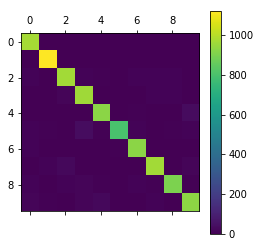

In [20]:
# Confusion Matrix of ensemble classifier
m =confusion_matrix(MNIST_test_target,ensembleList) 
print(m)
plt.matshow(m)
plt.colorbar()

## Load USPS on Python 3.x

In [67]:
from PIL import Image
import os
import numpy as np

In [68]:
# Data processing of USPS Data
USPSMat  = []
USPSTar  = []
curPath  = 'USPSdata/Numerals'
savedImg = []

for j in range(0,10):
    curFolderPath = curPath + '/' + str(j)
    imgs =  os.listdir(curFolderPath)
    for img in imgs:
        curImg = curFolderPath + '/' + img
        if curImg[-3:] == 'png':
            img = Image.open(curImg,'r')
            img = img.resize((28, 28))
            savedImg = img
            imgdata = (255-np.array(img.getdata()))/255
            USPSMat.append(imgdata)
            USPSTar.append(j)

Accuracy of USPS SVM: 0.2743137156857843
[[ 368    2  486  224  233  301   73  147   12  154]
 [  52  273  548  275  257  173   18  327   55   22]
 [ 151  100 1205  132   48  233   57   37   26   10]
 [  65   49  407  844   14  494    6   38   66   17]
 [  27   28  236  119  817  215   15  408   74   61]
 [  60   23  688  284   58  756   35   35   48   13]
 [ 174   20  913   93   74  216  444   30    3   33]
 [  25   68  185  755   66  286    7  478   92   38]
 [ 149   25  315  566  119  553   68   62  126   17]
 [  14   35  220  680  138   96    6  506  130  175]]


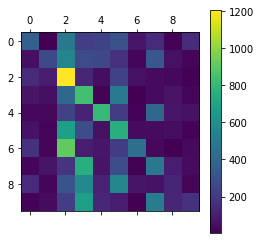

In [89]:
# Confusion matrix of usps data using the model trained on MNIST data using SVM
predicted_training_target_USPS = classifier1.predict(USPSMat)
print("Accuracy of USPS SVM:",metrics.accuracy_score(predicted_training_target_USPS, USPSTar))
m = confusion_matrix(USPSTar,predicted_training_target_USPS) 
print(m)
plt.matshow(m)
plt.colorbar()

Accuracy of USPS RFC: 0.3114655732786639
[[ 577   58  265   54  433  181  116  119   15  182]
 [  51  531  209   80  103   46   49  902   16   13]
 [ 212  134  933  131   70  187   73  225   14   20]
 [ 118   96  164  958   82  354   20  167   10   31]
 [  24  279  117   38  901  119   65  399   21   37]
 [ 200   92  201  230   81 1016   33  112    8   27]
 [ 368  140  306   80  151  303  527   89   15   21]
 [  74  450  407  154   59  208   28  599    4   17]
 [ 130  182  262  253  164  692   72  100  100   45]
 [  62  332  283  242  256  149   20  522   47   87]]


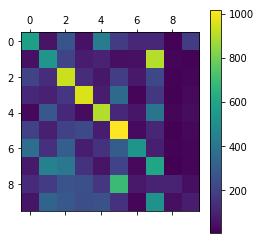

In [81]:
# Confusion matrix of usps data using the model trained on MNIST data using Random Forest
predicted_training_target_USPS_RFC = classifierRFC.predict(USPSMat)
print("Accuracy of USPS RFC:",metrics.accuracy_score(predicted_training_target_USPS_RFC, USPSTar))
m = confusion_matrix(USPSTar,predicted_training_target_USPS_RFC) 
print(m)
plt.matshow(m)
plt.colorbar()

USPS Test Accuracy:  0.6581829091454573
[[1743    4    2   26   48   15   75    0   52   35]
 [  29 1286   58  404   16   23   17    6  125   36]
 [ 125   53 1207  369   17   49   99    6   58   16]
 [  33   25   60 1755    2   43   15    3   44   20]
 [ 220   12    5   42 1269   26   34    1  152  239]
 [ 231    2   12  344   18 1147   50    0  138   58]
 [  78   10   57  133   46   20 1583    0   57   16]
 [ 185  128   73  162   42    3    2  472  548  385]
 [ 230    3   17  113   21   28   49    1 1448   90]
 [ 151    4    5   98  205   19   10    8  247 1253]]


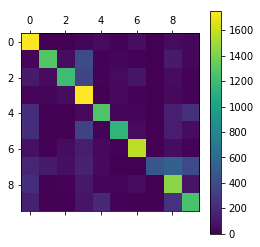

In [110]:
# Confusion matrix of usps data using the model trained on MNIST data using Losgitic Regression
w_usps = logisticRegression(np.array(USPSMat),np.array(USPSTar))
AccuracyTestLogUSPS , PredictedTargetTestLogUSPS = getAccuracy(np.array(USPSMat),np.array(USPSTar),w_usps)
print('USPS Test Accuracy: ', AccuracyTestLogUSPS)
m = confusion_matrix(USPSTar,PredictedTargetTestLogUSPS) 
print(m)
plt.matshow(m)
plt.colorbar()

Accuracy for Usps Testing : 0.3734186709275859
[[ 481    2  273   86  174  190   69   48  102  575]
 [ 100  328  205  246  199  192   26  559   92   53]
 [  96    9 1309  162   42  213   58   54   37   19]
 [  50    2  139 1223    5  439    6   53   67   16]
 [  23   38   53   43  929  196   46  279  139  254]
 [  90   12  196  158   30 1344   69   42   45   14]
 [ 144    4  379  107   85  429  767   13   38   34]
 [ 110  185  262  507   41  181   13  505  116   80]
 [ 209   15  155  240  106  737  123   65  290   60]
 [  27  129  134  439  123   99   13  521  223  292]]


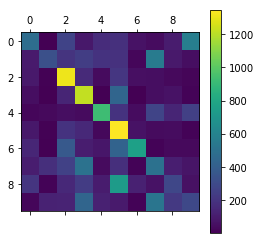

In [115]:
# Confusion matrix of usps data using the model trained on MNIST data using Neural Network
UspsAccuracy,PredictedTargetValuesNNUSPS = NeuralNetwork(MNIST_training_data,np.array(USPSMat),MNIST_training_target,np.array(USPSTar))
print('Accuracy for Usps Testing : ' + str(UspsAccuracy))
m = confusion_matrix(USPSTar,PredictedTargetValuesNNUSPS) 
print(m)
plt.matshow(m)
plt.colorbar()

In [119]:
# Confusion matrix of usps data using the model trained on MNIST data using Ensmeble Classifier
EnsembleAccuracyUSPS, ensembleUSPS = ensembleClassifier(np.array(USPSTar), PredictedTargetTestLogUSPS, predicted_training_target_USPS_RFC, predicted_training_target_USPS,PredictedTargetValuesNNUSPS)
print('USPS EnsembleAccuracy: ', EnsembleAccuracyUSPS)

[0, 5, 5, 0, 9, 0, 0, 0, 0, 4, 6, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 9, 0, 9, 9, 0, 0, 4, 0, 0, 0, 6, 3, 0, 0, 0, 2, 5, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 4, 9, 4, 0, 0, 2, 0, 0, 0, 2, 5, 0, 0, 0, 5, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 5, 0, 2, 0, 0, 5, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 3, 0, 0, 3, 0, 0, 2, 0, 9, 9, 0, 0, 2, 0, 2, 2, 0, 4, 0, 0, 0, 0, 9, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 5, 2, 0, 4, 0, 0, 0, 0, 9, 0, 0, 0, 7, 7, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 9, 0, 9, 0, 9, 0, 0, 9, 4, 9, 2, 0, 5, 0, 0, 0, 0, 0, 4, 0, 4, 7, 0, 0, 0, 0, 0, 9, 4, 4, 5, 0, 0, 0, 6, 0, 0, 2, 8, 0, 0, 0, 5, 0, 0, 7, 0, 3, 0, 0, 0, 0, 6, 6, 0, 0, 0, 0, 0, 4, 0, 0, 0, 5, 0, 5, 0, 0, 4, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 2, 5, 6, 0, 0, 0, 0, 0, 5, 5, 2, 2, 0, 0, 0, 0, 0, 9, 0, 2, 0, 4, 2, 0, 0, 0, 6, 0, 5, 0, 0, 0, 0, 6, 6, 9, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 3, 0, 3, 2, 0, 8, 4, 0, 0, 0, 0, 0, 0, 0, 8, 4, 0, 0, 0, 9, 

[[1105    4  211   42  205  124   41   35   18  215]
 [  61  617  216  316  113  101   18  505   42   11]
 [ 100   33 1411  184   28  131   45   35   26    6]
 [  41   12  117 1543    3  218   10   23   22   11]
 [  94   41   53   41 1218  133   24  201   84  111]
 [ 138    9  147  230   26 1335   37   22   32   24]
 [ 124   14  317   93   70  207 1134    5   18   18]
 [  90  176  193  437   42  165    3  597  226   71]
 [ 198   21  116  277   66  590   73   37  572   50]
 [  75  109  110  392  179   62   10  420  194  449]]


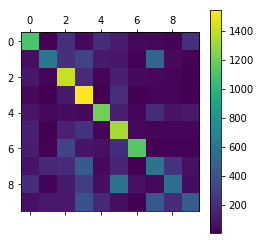

In [120]:
m = confusion_matrix(USPSTar,ensembleUSPS) 
print(m)
plt.matshow(m)
plt.colorbar()

In [36]:
#Convolution Neural Network for MNIST data 
#Used only one epoch because even one epoch is taking more than 1 hour
# Hence did not tune hyper parameter
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
num_classes=10
image_vector_size=(28,28,1)
x_train = MNIST_training_data.reshape(MNIST_training_data.shape[0], 28,28,1) 
x_test = MNIST_test_data.reshape(MNIST_test_data.shape[0], 28,28,1) 
y_train = keras.utils.to_categorical(MNIST_training_target, num_classes)
y_test = keras.utils.to_categorical(MNIST_test_target, num_classes)

image_size = 784 
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train,batch_size=1024,epochs=1, verbose= True , validation_split=.1)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 45000 samples, validate on 5000 samples
Epoch 1/1
45000/45000 [==============================] - 1131s 25ms/step - loss: 2.2846 - acc: 0.1652 - val_loss: 2.2542 - val_acc: 0.2892
Test loss: 2.2533906925201417
Test accuracy: 0.2896
